<a href="https://colab.research.google.com/github/Tomer87/Respiratory_Health_Classification_Using_Sound/blob/main/Respiratory_Health_Classification_using_sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Respiratory Health Classification Using Sound

# only for us - delete it


try using the demographic info to improve the model

**3 steps work:**

https://www.kaggle.com/shivam316/part-1-preprocessing

https://www.kaggle.com/shivam316/part-2-handel-imbalance-creating-spectrogram

https://www.kaggle.com/shivam316/part-3-feature-extraction-modeling-95-acc

**Another work:**

https://www.kaggle.com/vbookshelf/play-audio-read-the-files-create-a-spectrogram


# Introduction


This is a work done as a part of our final project pursuing our Practical Data Science certificate

Team members:
- Judi Eliya
- Shirli Miller
- Tomer Badug

Dataset based on Kaggle data from:
https://www.kaggle.com/vbookshelf/respiratory-sound-database




---

The Problem we aim to solve and our general strategy


---



# Data

## The Data



---


insert some explenation about the data and how it is orgenized

---





https://www.kaggle.com/vbookshelf/respiratory-sound-database

**Citation:**

Paper: Α Respiratory Sound Database for the Development of Automated Classification

Rocha BM, Filos D, Mendes L, Vogiatzis I, Perantoni E, Kaimakamis E, Natsiavas P, Oliveira A, Jácome C, Marques A, Paiva RP (2018) In Precision Medicine Powered by pHealth and Connected Health (pp. 51-55). Springer, Singapore.

https://eden.dei.uc.pt/~ruipedro/publications/Conferences/ICBHI2017a.pdf

Ref Websites
http://www.auditory.org/mhonarc/2018/msg00007.html
http://bhichallenge.med.auth.gr/

### Theory and literature review

Sound waves, due to their propagation properties, their sensitivity to medium variations along with the human ability to distinguish variations and detect changes, made them viable in vast variaty of applications. we use different sounds to indicate different situations starting with distinguishing between a phonecall sound to a message received in our cell phones, identifying the person we talk to by his unique voice and even using noise monitoring as a machinery malfunctioning indicator when our car is starting to make "weird sounds". Those day-to-day applications has been further developed to commercial applications such as machinery malfunctioning detection, health inspections and many more.

When health and human body are involved, there is a significant weight for application that are safe, privacy-protecting and reliable. Since sound monitoring is a non-invasive way to get information from internal systems it is extreamly useful in health problem detecting, especialy in the Respiratory system where the sound of air flow rushing through the system might vary due to different health condition.


Much work was done trying to predict different pathologies using sound. In 
[2] a binary classifier is suggested for normal / pathological voice recording using Mel-Frequency Cepstral Coefficients (MFCC) and Mel-Spectrogram representation followed by SVM, CNN, Autoencoders and combinations of them.  In [3] the authors predict Asthma pathology based on wheezes found in lung sounds. [4],[5] and [6] offer a review for relevant voice parameters such as pitch, formants, harmonices etc… combining with different domain analysis (Time, Spectrum, Ceptrum) extracting various features such as Jitter, Shimmer, Harmonic-Noise-Ratio (HNR), MFCC, Normalized Noise Energy (NNE) and many more.

Some of the research was based on recording performed by a simple microphone, some were recorded by an electronic stethoscopes and other by cell-phone internal microphone. It seems that it is important to perform the recording in a silent laboratory environment.

Machine-Learning technique wise - it seems that SVM is vastly used either to perform the classification task or as a support decision calssifier following CNN based architecture. 



---


[1] 		  	 I.  Thoidis,  M.   Giouvanakis, and  G.   Papanikolaou, "Audio-based detection of malfunctioning machines using deep  convolutional autoencoders," Paper 10330, (2020 May.). doi: 	  

[2] Guan, Hongzhao & Lerch, Alexander. (2019). Learning Strategies for Voice Disorder Detection. 10.1109/ICOSC.2019.8665504.

[3] Islam, M.A.; Bandyopadhyaya, I.; Bhattacharyya, P.; Saha, G. Multichannel lung sound analysis for asthma detection. Comput. Meth. Programs Biomed. 2018, 159, 111–123.

[4] Dixit, Dixit & Mittal, Vikas & Sharma, Yuvraj. (2014). Voice Parameter Analysis for the disease detection. IOSR Journal of Electronics and Communication Engineering. 9. 48-55. 10.9790/2834-09314855.

[5] Saloni, Rajender K. Sharma, and Anil K. Gupta. "Disease detection using voice analysis: a review." International Journal of Medical Engineering and Informatics 6.3 (2014): 189-209.

[6] Rafael Orozco Arroyave, Juan, Jesus Francisco Vargas Bonilla, and Edilson Delgado Trejos. "Acoustic analysis and non linear dynamics applied to voice pathology detection: A review." Recent Patents on Signal Processing (Discontinued) 2.2 (2012): 96-107.


## Installs

In [1]:
#!pip install *** something ***

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from random import sample
# from numpy.random import rand, shuffle

# import string
# import re
# from unicodedata import normalize
# from numpy import array

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K   # not sure if needed. verify what it does
# from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, LSTM, RepeatVector, TimeDistributed, Embedding
# from tensorflow.keras.utils import to_categorical, plot_model
# from tensorflow.keras.optimizers import Adam, Adadelta
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.losses import categorical_crossentropy

# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.callbacks import ModelCheckpoint

import seaborn as sns
import librosa as lb
import librosa.display
import soundfile as sf
import os

# random seeds must be set before importing keras & tensorflow
my_seed = 0
np.random.seed(my_seed)
tf.random.set_seed(my_seed)

from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
# path = '/content/drive/My Drive/Data Science/Core materials/03 - Machine Learning/05 - Deep learning and friends/03 - Deep learning architectures/'

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
path0 = '/content/gdrive/MyDrive/Final_project_data/'

## Preprocessing and orgenizing data

In [6]:
data_diagnosis = pd.read_csv(path0 + 'patient_diagnosis.csv', names=['pid', 'Disease'])
data_diagnosis.head()

,pid,Disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [7]:
path=path0 + 'audio_and_txt_files/'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]
files.sort()
files[:5]

['101_1b1_Al_sc_Meditron',
 '101_1b1_Pr_sc_Meditron',
 '102_1b1_Ar_sc_Meditron',
 '103_2b2_Ar_mc_LittC2SE',
 '104_1b1_Al_sc_Litt3200']

In [8]:
def getFilenameInfo(file):
    return file.split('_')

In [9]:
files_data=[]
for file in files:
    data=pd.read_csv(path + file + '.txt',sep='\t',names=['start','end','crackles','weezels'])
    name_data=getFilenameInfo(file)
    data['pid']=name_data[0]
    data['mode']=name_data[-2]
    data['filename']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df

,start,end,crackles,weezels,pid,mode,filename
0,0.036,0.579,0,0,101,sc,101_1b1_Al_sc_Meditron
1,0.579,2.450,0,0,101,sc,101_1b1_Al_sc_Meditron
2,2.450,3.893,0,0,101,sc,101_1b1_Al_sc_Meditron
3,3.893,5.793,0,0,101,sc,101_1b1_Al_sc_Meditron
4,5.793,7.521,0,0,101,sc,101_1b1_Al_sc_Meditron
...,...,...,...,...,...,...,...
6,11.721,13.693,1,0,226,sc,226_1b1_Pl_sc_LittC2SE
7,13.693,15.536,0,0,226,sc,226_1b1_Pl_sc_LittC2SE
8,15.536,17.493,0,0,226,sc,226_1b1_Pl_sc_LittC2SE
9,17.493,19.436,1,0,226,sc,226_1b1_Pl_sc_LittC2SE


In [10]:
data_diagnosis.pid=data_diagnosis.pid.astype('int32')
files_df.pid=files_df.pid.astype('int32')

In [11]:
data=pd.merge(files_df,data_diagnosis,on='pid')
data.head(5)

,start,end,crackles,weezels,pid,mode,filename,Disease
0,0.036,0.579,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
1,0.579,2.450,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
2,2.450,3.893,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
3,3.893,5.793,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI
4,5.793,7.521,0,0,101,sc,101_1b1_Al_sc_Meditron,URTI


In [12]:
os.makedirs(path0 + 'csv_data')
data.to_csv(path0 + 'csv_data/data.csv',index=False)

## Utilities

In [13]:
def getPureSample(raw_data,start,end,sr=22050):
    '''
    Takes a numpy array and spilts its using start and end args
    
    raw_data=numpy array of audio sample
    start=time
    end=time
    sr=sampling_rate
    mode=mono/stereo
    
    '''
    max_ind = len(raw_data) 
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

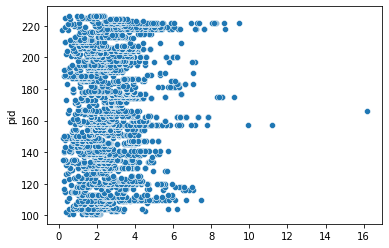

In [14]:
sns.scatterplot(x=(data.end-data.start), y=data.pid)


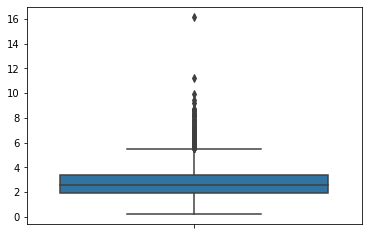

In [15]:
sns.boxplot(y=(data.end-data.start))

In [16]:
os.makedirs(path0 +'processed_audio_files')

In [17]:
i,c=0,0
for index,row in data.iterrows():
    maxLen=6
    start=row['start']
    end=row['end']
    filename=row['filename']
    
    #If len > maxLen , change it to maxLen
    if end-start>maxLen:
        end=start+maxLen
    
    audio_file_loc=path + filename + '.wav'
    
    if index > 0:
        #check if more cycles exits for same patient if so then add i to change filename
        if data.iloc[index-1]['filename']==filename:
            i+=1
        else:
            i=0
    filename= filename + '_' + str(i) + '.wav'
    
    save_path= path0 +'processed_audio_files/' + filename
    c+=1
    
    audioArr,sampleRate=lb.load(audio_file_loc)
    pureSample=getPureSample(audioArr,start,end,sampleRate)
    
    #pad audio if pureSample len < max_len
    reqLen=6*sampleRate
    padded_data = lb.util.pad_center(pureSample, reqLen)
    
    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total Files Processed: ',c)

Total Files Processed:  6898


## EDA

In the following plot we can see that classes are imbalanced so we must split them into train and validation set via stratify

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

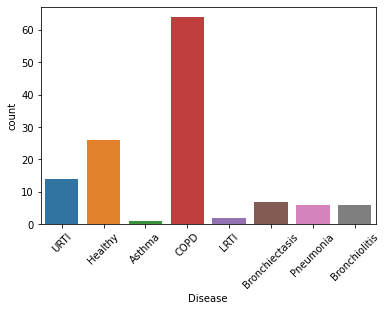

In [18]:
sns.countplot(data_diagnosis.Disease)
plt.xticks(rotation=45)

In [19]:
def extractId(filename):
    return filename.split('_')[0]

In [20]:
path= path0 +'processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

,pid,filename
0,130,130_2p5_Tc_mc_AKGC417L_10.wav
1,107,107_2b5_Tc_mc_AKGC417L_3.wav
2,186,186_2b2_Lr_mc_AKGC417L_2.wav
3,218,218_1b1_Lr_sc_Meditron_7.wav
4,213,213_1p5_Pl_mc_AKGC417L_5.wav


In [22]:
files_df.pid=files_df.pid.astype('int64')

In [23]:
data=pd.merge(files_df,data_diagnosis,on='pid')
data.head()

,pid,filename,Disease
0,130,130_2p5_Tc_mc_AKGC417L_10.wav,COPD
1,130,130_3b3_Ll_mc_AKGC417L_1.wav,COPD
2,130,130_1p3_Lr_mc_AKGC417L_4.wav,COPD
3,130,130_1p2_Pl_mc_AKGC417L_3.wav,COPD
4,130,130_1p4_Pl_mc_AKGC417L_4.wav,COPD


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

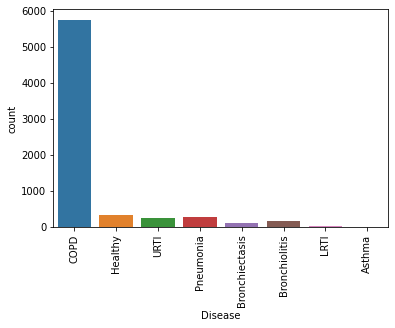

In [24]:
sns.countplot(data.Disease)
plt.xticks(rotation=90)

In [25]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval = train_test_split(data,data.Disease,
                                           stratify=data.Disease,random_state=42,
                                           test_size=0.25)

In [26]:
Xtrain.Disease.value_counts()/Xtrain.shape[0]

COPD              0.832979
Healthy           0.046588
Pneumonia         0.041369
URTI              0.035183
Bronchiolitis     0.023197
Bronchiectasis    0.015078
LRTI              0.004639
Asthma            0.000967
Name: Disease, dtype: float64

In [27]:
Xval.Disease.value_counts()/Xval.shape[0]

COPD              0.833043
Healthy           0.046957
Pneumonia         0.041159
URTI              0.035362
Bronchiolitis     0.023188
Bronchiectasis    0.015072
LRTI              0.004638
Asthma            0.000580
Name: Disease, dtype: float64

% of class labels in same in both train and val as we can see above

We did this because this will help our model to learn and validate classes , it will not be like we are training only on COPD disease and there is no COPD in our validation

## handling imbalanced data and feature extraction



---


 using data augmentation for more samples
 https://arxiv.org/pdf/1912.05472.pdf


---



[Text(0.5, 1.0, 'MFCC')]

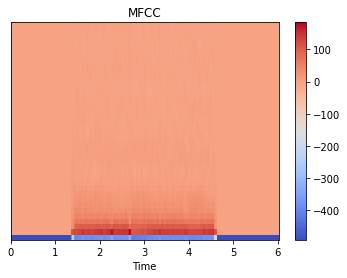

In [28]:
path= path0 + 'processed_audio_files/'

file=path + Xtrain.iloc[101].filename 
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

In [29]:
Xtrain.to_csv('train.csv')
Xval.to_csv('val.csv')

### part 3

In [30]:
ytrain=Xtrain.Disease
yval=Xval.Disease
yval

3020    COPD
2775    COPD
825     COPD
556     COPD
4527    COPD
        ... 
1562    COPD
4427    COPD
4675    COPD
2363    COPD
1591    COPD
Name: Disease, Length: 1725, dtype: object

In [31]:
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

In [32]:
def getFeatures(path):
    soundArr,sample_rate=lb.load(path)
    mfcc=lb.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=lb.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=lb.feature.melspectrogram(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec

In [33]:
root= path0 +'processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in Xval.iterrows():
    path=root + row['filename']
    a,b,c =getFeatures(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
    
mfcc_val=np.array(mfcc)
cstft_val=np.array(cstft)
mSpec_val=np.array(mSpec)

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [43]:
root= path0 +'processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in Xtrain.iterrows():
    path=root + row['filename']
    a,b,c=getFeatures(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)

    
mfcc_train=np.array(mfcc)
cstft_train=np.array(cstft)
mSpec_train=np.array(mSpec)

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


# The model

In [44]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [45]:
#first model - MFCC model
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [46]:
#second model - Chroma STFT model

croma_input=keras.layers.Input(shape=(12,259,1),name="cromaInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
croma_output=keras.layers.GlobalMaxPooling2D()(x)

croma_model=keras.Model(croma_input, croma_output, name="cromaModel")

In [47]:
#third model - Mel Spectrogram model

mSpec_input=keras.layers.Input(shape=(128,259,1),name="mSpecInput")
x=keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=keras.layers.GlobalMaxPooling2D()(x)

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [48]:
# building the entire neural network

input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=keras.layers.Input(shape=(12,259,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mSpec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,croma,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

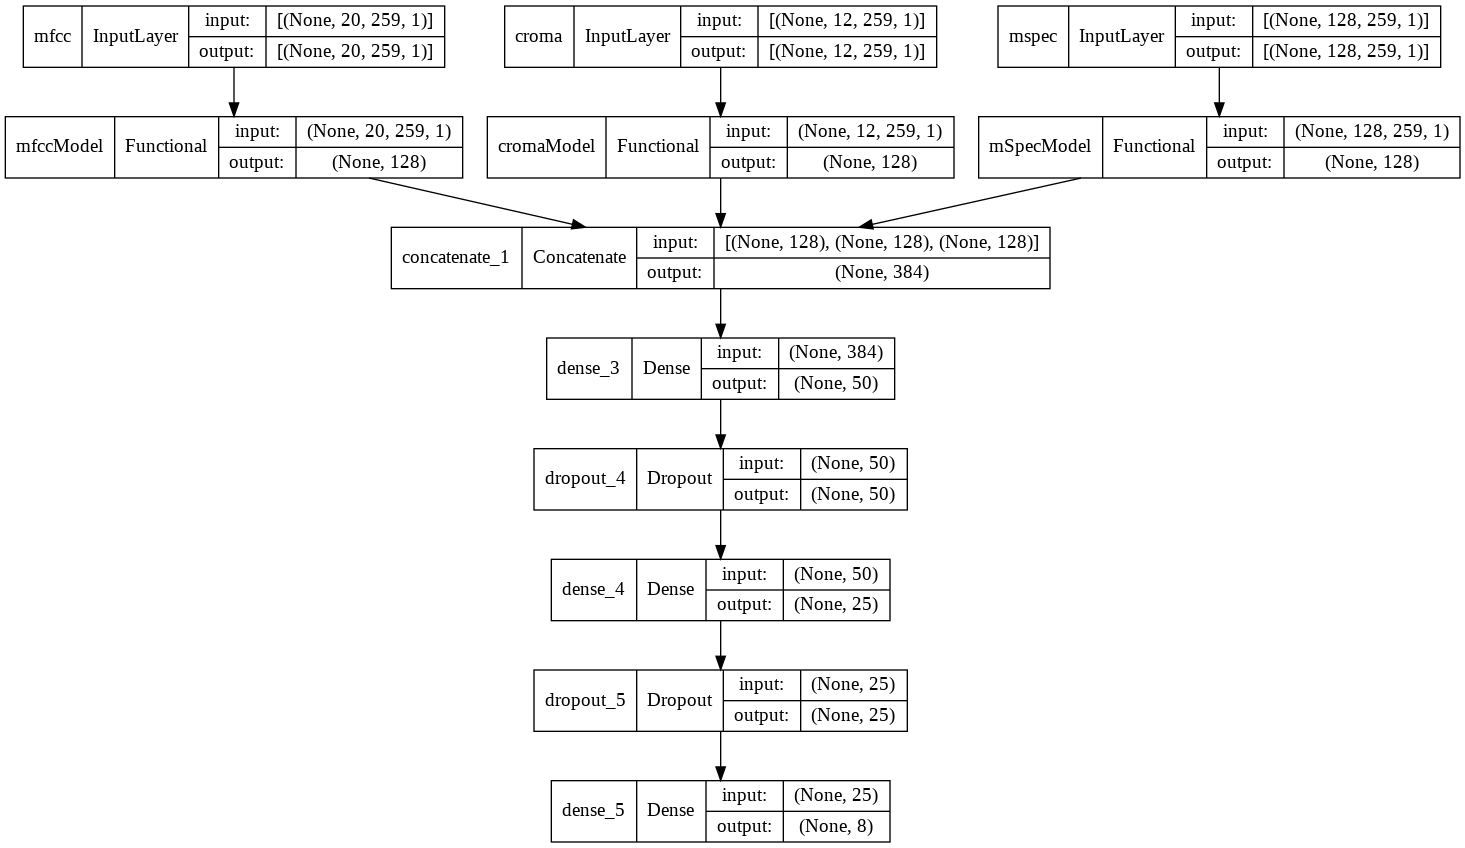

In [49]:
# Plotting the model architecture
keras.utils.plot_model(net, "net.png", show_shapes=True)

In [50]:
from keras import backend as K
net.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
K.set_value(net.optimizer.learning_rate, 0.001)

In [51]:
history=net.fit(
    {"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train},
    ytrain,
    validation_data=({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)

Epoch 1/100
162/162 [==============================] - 75s 431ms/step - loss: 0.9134 - accuracy: 0.7197 - val_loss: 0.7310 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 70s 431ms/step - loss: 0.5516 - accuracy: 0.8326 - val_loss: 0.4478 - val_accuracy: 0.8487 - lr: 0.0010
Epoch 3/100
162/162 [==============================] - 69s 429ms/step - loss: 0.4569 - accuracy: 0.8407 - val_loss: 0.4259 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 4/100
162/162 [==============================] - 69s 428ms/step - loss: 0.4154 - accuracy: 0.8506 - val_loss: 0.4806 - val_accuracy: 0.8157 - lr: 0.0010
Epoch 5/100
162/162 [==============================] - 69s 429ms/step - loss: 0.3915 - accuracy: 0.8564 - val_loss: 0.3615 - val_accuracy: 0.8580 - lr: 0.0010
Epoch 6/100
162/162 [==============================] - 69s 429ms/step - loss: 0.3698 - accuracy: 0.8583 - val_loss: 0.4180 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 7/100
162/162 [=========================

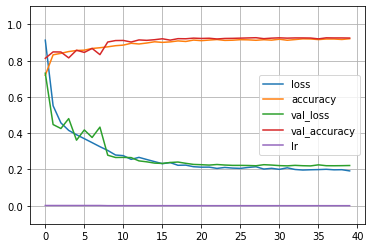

In [52]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

# Model evaluation

In [53]:
net.evaluate({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval)

54/54 [==============================] - 6s 109ms/step - loss: 0.2217 - accuracy: 0.9252


[0.22166761755943298, 0.9252173900604248]

# Summary



---

Summary of our work and next steps for further investigation


---



